In [302]:
import pandas as pd
import numpy as np

In [303]:
df_customer=pd.read_csv('movie_customer_cleaned_ver2.csv',engine='python')
df_customer.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,12-23-2014,1,10.997323739842438
1,C5002,M,CA,23,20s,S,N,2014,N,.,10-25-2016,1,23.661645122771986
2,C5003,F,TX,39,30s,M,N,2014,N,.,12-21-2018,1,48.82168057044957
3,C5004,F,TX,69,60s+,M,N,2014,N,.,12-30-2014,1,38.82268563432438
4,C5005,F,SC,60,60s+,M,N,2014,N,.,12-09-2018,1,36.84197697319961


In [304]:
df_download=pd.read_csv('movie_download_cleaned.csv',engine='python')
df_download.head()

,customer_id,item_id,down_year,down_date,weekday,inf_year,down_price
0,C5001,I-1010,2014,02-21-2014,6,1.051872,0.946685
1,C5001,I-1014,2014,04-04-2014,6,1.051872,0.946685
2,C5001,I-1017,2014,01-19-2014,1,1.051872,0.946685
3,C5001,I-1028,2014,01-21-2014,3,1.051872,0.946685
4,C5001,I-1035,2014,03-11-2014,3,1.051872,0.899351


In [305]:
download_cnt = pd.DataFrame(df_download["customer_id"].value_counts())
download_cnt=download_cnt.sort_index()

download_cnt.head()

,customer_id
C5001,11
C5002,23
C5003,50
C5004,40
C5005,38


In [306]:
download_cus_id=download_cnt.set_index('customer_id')
download_cus_id

""
customer_id
11
23
50
40
38
50
50
42
3


In [307]:
download_cnt.index
# download_cnt의 인덱스를 customer_id로 인덱스 교체후 그 index값의 값을 불러옴
# 데이터 프레임에 인덱스값을 key로 다시 넣어주기 위해서임
download_cus_id=download_cnt.set_index('customer_id')
download_cus_id.index
# key=customer_id values= 각 고객별 다운로드 수를 데이터 프레임에 담음
download_count=pd.DataFrame({'customer_id':download_cnt.index,
                'download_cnt':download_cus_id.index})
download_count

,customer_id,download_cnt
0,C5001,11
1,C5002,23
2,C5003,50
3,C5004,40
4,C5005,38
5,C5006,50
6,C5007,50
7,C5008,42
8,C5009,3
9,C5010,27


In [308]:
merged_mv_cus=pd.merge(df_customer,download_count,on=['customer_id'],how='left')
merged_mv_cus

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,12-23-2014,1,10.997323739842438,11.0
1,C5002,M,CA,23,20s,S,N,2014,N,.,10-25-2016,1,23.661645122771986,23.0
2,C5003,F,TX,39,30s,M,N,2014,N,.,12-21-2018,1,48.82168057044957,50.0
3,C5004,F,TX,69,60s+,M,N,2014,N,.,12-30-2014,1,38.82268563432438,40.0
4,C5005,F,SC,60,60s+,M,N,2014,N,.,12-09-2018,1,36.84197697319961,38.0
5,C5006,F,CA,76,60s+,S,N,2014,N,.,12-12-2015,1,48.837482299430775,50.0
6,C5007,F,FL,69,60s+,M,N,2014,N,.,12-30-2016,1,48.076937398386775,50.0
7,C5008,M,GA,39,30s,M,Y,2014,N,.,12-26-2015,1,40.74933685713398,42.0
8,C5009,M,VA,30,30s,M,Y,2014,Y,2015,11-22-2014,1,3.365991005977599,3.0
9,C5010,M,TN,32,30s,M,N,2014,N,.,12-27-2014,1,27.221373891803985,27.0


In [309]:
# 사용기간 파생변수로 만들어냄. drop_year와 register_year만 사용

for i in range(len(merged_mv_cus)):
    if merged_mv_cus['drop_year'][i]=='.':
        merged_mv_cus.loc[i, 'duration']= 2018 - int(merged_mv_cus['register_year'][i])
    else:
        merged_mv_cus.loc[i, 'duration']= int(merged_mv_cus['drop_year'][i]) - int(merged_mv_cus['register_year'][i])

In [310]:
merged_mv_cus.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,12-23-2014,1,10.997323739842438,11.0,1.0
1,C5002,M,CA,23,20s,S,N,2014,N,.,10-25-2016,1,23.661645122771986,23.0,4.0
2,C5003,F,TX,39,30s,M,N,2014,N,.,12-21-2018,1,48.82168057044957,50.0,4.0
3,C5004,F,TX,69,60s+,M,N,2014,N,.,12-30-2014,1,38.82268563432438,40.0,4.0
4,C5005,F,SC,60,60s+,M,N,2014,N,.,12-09-2018,1,36.84197697319961,38.0,4.0


In [311]:
df_download['item_id'].value_counts()

I-1042    1226
I-1045    1218
I-1044    1217
I-1043    1215
I-1057    1202
I-1041    1168
I-1008    1155
I-1012    1153
I-1053    1135
I-1066    1131
I-1058    1118
I-1010    1118
I-1050    1112
I-1013    1110
I-1049    1110
I-1007    1106
I-1047    1102
I-1016    1100
I-1065    1099
I-1006    1098
I-1067    1092
I-1009    1086
I-1052    1082
I-1048    1078
I-1051    1074
I-1054    1063
I-1055    1061
I-1056    1056
I-1002     979
I-1036     965
          ... 
I-1023     421
I-1089     419
I-1075     415
I-1037     415
I-1090     407
I-1072     403
I-1028     401
I-1004     400
I-1091     400
I-1025     399
I-1033     399
I-1088     393
I-1029     392
I-1030     392
I-1092     378
I-1038     376
I-1094     327
I-1093     325
I-1106     183
I-1104     181
I-1102     180
I-1105     169
I-1100     164
I-1101     163
I-1097     161
I-1096     159
I-1095     147
I-1103     144
I-1099     144
I-1098     136
Name: item_id, Length: 106, dtype: int64

In [312]:
df_download['down_date'].value_counts()

02-03-2017    117
01-13-2017    110
06-09-2017    108
02-24-2017    106
03-23-2018    106
02-09-2018    105
02-24-2018    105
05-05-2017    104
02-17-2017    103
01-19-2018    103
03-31-2017    102
04-07-2017    101
06-01-2018    100
07-08-2017    100
01-12-2018     99
01-28-2017     98
03-05-2017     98
03-03-2017     98
08-04-2017     98
01-06-2018     97
08-11-2017     96
02-11-2017     96
05-11-2018     96
02-19-2017     95
01-13-2018     95
01-14-2017     95
01-01-2017     95
09-08-2017     95
07-13-2018     95
07-07-2017     94
             ... 
10-01-2014      6
05-28-2014      6
11-19-2014      6
06-16-2014      6
10-27-2014      6
04-14-2014      6
12-15-2014      6
02-17-2014      6
07-21-2014      6
09-02-2014      6
10-20-2014      6
01-14-2014      6
12-02-2014      6
07-30-2014      5
08-18-2014      5
06-09-2014      5
09-30-2014      5
11-12-2014      5
04-30-2014      5
09-01-2014      5
04-09-2014      5
04-08-2014      5
08-25-2014      5
12-11-2014      5
09-23-2014

In [313]:
df_download_timeseries=pd.DataFrame(df_download['down_date'].value_counts())
df_download_timeseries

,down_date
02-03-2017,117
01-13-2017,110
06-09-2017,108
02-24-2017,106
03-23-2018,106
02-09-2018,105
02-24-2018,105
05-05-2017,104
02-17-2017,103
01-19-2018,103


In [314]:
import matplotlib
import matplotlib.pyplot as plt

In [315]:
import seaborn as sns

In [316]:
merged_mv_cus['state'].value_counts()

CA    461
NC    435
TX    273
NV    222
FL    217
SC    200
VA    152
TN    139
NY    135
MD    116
GA    109
IL     77
AL     68
PA     67
WV     60
KY     59
LA     53
NJ     52
IN     46
AR     42
OH     42
MI     41
MS     32
DC     31
MA     29
CT     24
IA     16
AZ     15
MN     13
WI     12
NH      9
DE      7
ME      7
VT      7
RI      6
OR      3
Name: state, dtype: int64

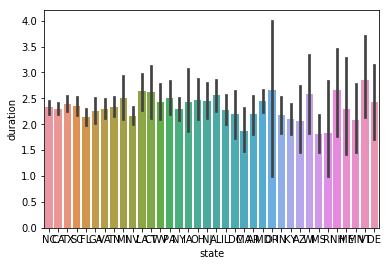

In [317]:
sns.barplot(x="state", y="duration", data=merged_mv_cus)

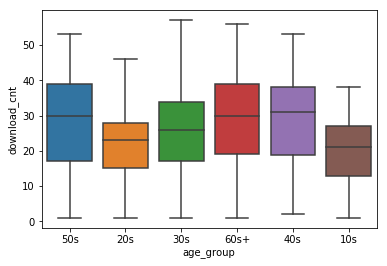

In [318]:


sns.boxplot(x='age_group',y='download_cnt',data=merged_mv_cus)

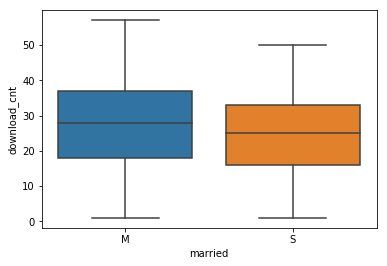

In [319]:
sns.boxplot(x='married',y='download_cnt',data=merged_mv_cus)

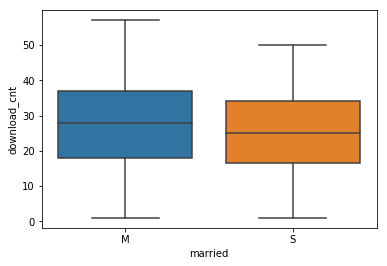

In [320]:
df_age_group=merged_mv_cus[merged_mv_cus.age_group!='10s']
sns.boxplot(x='married',y='download_cnt',data=df_age_group)

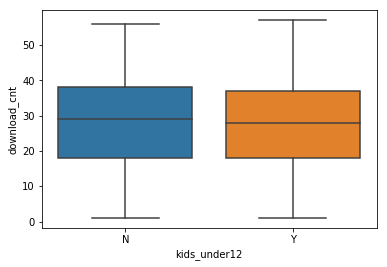

In [321]:
df_married=merged_mv_cus[merged_mv_cus.married=='M']
sns.boxplot(x='kids_under12',y='download_cnt',data=df_married)

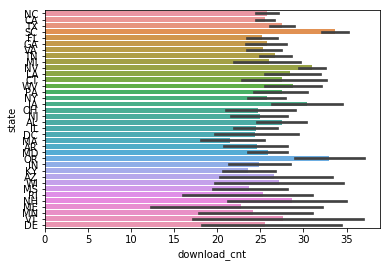

In [322]:

sns.barplot(x='download_cnt',y='state',data=merged_mv_cus)

In [323]:
merged_mv_cus['drop_year'].value_counts()

.       2618
2018     197
2017     189
2016     143
2015     130
Name: drop_year, dtype: int64

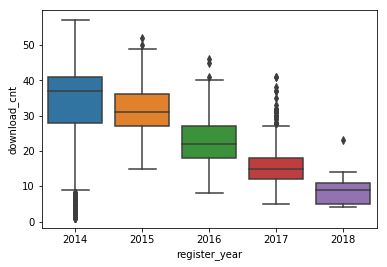

In [324]:
sns.boxplot(x='register_year',y='download_cnt',data=merged_mv_cus)

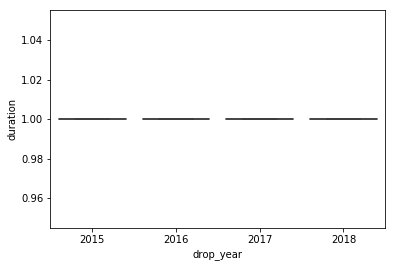

In [325]:
df_drop=merged_mv_cus[merged_mv_cus.drop_year!='.']
sns.boxplot(x='drop_year',y='duration', data=df_drop)

In [326]:
len(list(merged_mv_cus[merged_mv_cus.drop_flag=='Y']['customer_id']))

659

In [327]:
drop_villian=list(merged_mv_cus[merged_mv_cus.drop_flag=='Y']['customer_id'])

In [328]:
merged_mv_cus.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,12-23-2014,1,10.997323739842438,11.0,1.0
1,C5002,M,CA,23,20s,S,N,2014,N,.,10-25-2016,1,23.661645122771986,23.0,4.0
2,C5003,F,TX,39,30s,M,N,2014,N,.,12-21-2018,1,48.82168057044957,50.0,4.0
3,C5004,F,TX,69,60s+,M,N,2014,N,.,12-30-2014,1,38.82268563432438,40.0,4.0
4,C5005,F,SC,60,60s+,M,N,2014,N,.,12-09-2018,1,36.84197697319961,38.0,4.0


In [329]:
df_download

,customer_id,item_id,down_year,down_date,weekday,inf_year,down_price
0,C5001,I-1010,2014,02-21-2014,6,1.051872,0.946685
1,C5001,I-1014,2014,04-04-2014,6,1.051872,0.946685
2,C5001,I-1017,2014,01-19-2014,1,1.051872,0.946685
3,C5001,I-1028,2014,01-21-2014,3,1.051872,0.946685
4,C5001,I-1035,2014,03-11-2014,3,1.051872,0.899351
5,C5001,I-1036,2014,01-22-2014,4,1.051872,0.999279
6,C5001,I-1037,2014,12-23-2014,3,1.051872,0.999279
7,C5001,I-1038,2014,01-10-2014,6,1.051872,0.999279
8,C5001,I-1039,2014,10-19-2014,1,1.051872,0.999279
9,C5001,I-1042,2014,08-14-2014,5,1.051872,1.051872


In [330]:
df_download[df_download['down_date']==max(df_download['down_date'])]

,customer_id,item_id,down_year,down_date,weekday,inf_year,down_price
53962,C5151,I-1008,2017,12-31-2017,1,1.021,0.91890
54365,C5213,I-1067,2017,12-31-2017,1,1.021,1.10268
55632,C5388,I-1005,2017,12-31-2017,1,1.021,0.91890
55851,C5415,I-1010,2017,12-31-2017,1,1.021,0.91890
56349,C5492,I-1085,2017,12-31-2017,1,1.021,1.02100
56514,C5517,I-1067,2017,12-31-2017,1,1.021,1.10268
56841,C5564,I-1032,2017,12-31-2017,1,1.021,0.91890
56978,C5585,I-1041,2017,12-31-2017,1,1.021,0.91890
57123,C5605,I-1057,2017,12-31-2017,1,1.021,1.10268
57302,C5634,I-1079,2017,12-31-2017,1,1.021,0.96995


In [331]:
type(df_download['down_date'][0])

str

In [332]:
import datetime

df_download['down_date']=pd.to_datetime(df_download['down_date'])
down_counts=pd.DataFrame(df_download['down_date'].value_counts())
down_counts

,down_date
2017-02-03,117
2017-01-13,110
2017-06-09,108
2017-02-24,106
2018-03-23,106
2018-02-24,105
2018-02-09,105
2017-05-05,104
2017-02-17,103
2018-01-19,103


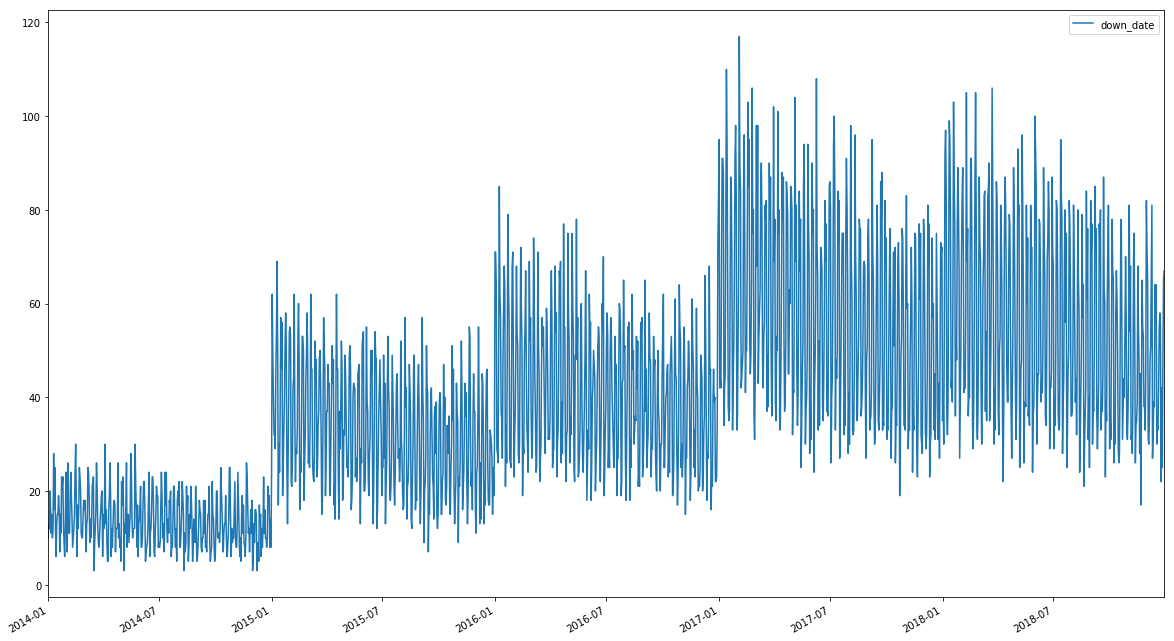

In [333]:
down_counts.plot(figsize=(20,12))

In [334]:
down_counts.index

DatetimeIndex(['2017-02-03', '2017-01-13', '2017-06-09', '2017-02-24',
               '2018-03-23', '2018-02-24', '2018-02-09', '2017-05-05',
               '2017-02-17', '2018-01-19',
               ...
               '2014-09-23', '2014-04-09', '2014-04-30', '2014-09-30',
               '2014-08-18', '2014-12-08', '2014-05-05', '2014-12-01',
               '2014-03-17', '2014-08-11'],
              dtype='datetime64[ns]', length=1824, freq=None)

In [335]:
import datetime

for i in range(len(down_counts)):
    down_counts.loc[down_counts.index[i],'weekday']= down_counts.index[i].weekday()

In [336]:
down_counts

,down_date,weekday
2017-02-03,117,4.0
2017-01-13,110,4.0
2017-06-09,108,4.0
2017-02-24,106,4.0
2018-03-23,106,4.0
2018-02-24,105,5.0
2018-02-09,105,4.0
2017-05-05,104,4.0
2017-02-17,103,4.0
2018-01-19,103,4.0


In [337]:
mon=0;tues=0;wed=0;thur=0;fri=0;sat=0;sun=0;
for i in range(len(down_counts)):
    if down_counts[str(down_counts.index[i])[0:10]]['weekday'][0]==0:
        mon += down_counts[str(down_counts.index[i])[0:10]]['down_date'][0]
    elif down_counts[str(down_counts.index[i])[0:10]]['weekday'][0]==1:
        tues += down_counts[str(down_counts.index[i])[0:10]]['down_date'][0]
    elif down_counts[str(down_counts.index[i])[0:10]]['weekday'][0]==2:
        wed += down_counts[str(down_counts.index[i])[0:10]]['down_date'][0]
    elif down_counts[str(down_counts.index[i])[0:10]]['weekday'][0]==3:
        thur += down_counts[str(down_counts.index[i])[0:10]]['down_date'][0]
    elif down_counts[str(down_counts.index[i])[0:10]]['weekday'][0]==4:
        fri += down_counts[str(down_counts.index[i])[0:10]]['down_date'][0]
    elif down_counts[str(down_counts.index[i])[0:10]]['weekday'][0]==5:
        sat += down_counts[str(down_counts.index[i])[0:10]]['down_date'][0]
    elif down_counts[str(down_counts.index[i])[0:10]]['weekday'][0]==6:
        sun += down_counts[str(down_counts.index[i])[0:10]]['down_date'][0]

In [338]:
type(down_counts[str(down_counts.index[0])[0:10]]['down_date'][0])

numpy.int64

In [339]:
print(mon,tues,wed,thur,fri,sat,sun)

6190 6789 7287 10318 15476 14012 13013


In [340]:
list_weekday=['mon','tues','wed','thur','fri','sat','sun']
down_weekday=[mon,tues,wed,thur,fri,sat,sun]

In [341]:
list_weekday

['mon', 'tues', 'wed', 'thur', 'fri', 'sat', 'sun']

([<matplotlib.patches.Wedge at 0x285cfe9de10>,
 [Text(1.061289973760161, 0.2892465930588584, 'mon'),
  Text(0.747229676445658, 0.8072470567545709, 'tues'),
  Text(0.1553974395193939, 1.0889681518716774, 'wed'),
  Text(-0.6346674490688402, 0.8984415557466446, 'thur'),
  Text(-1.087152606241257, -0.1676281919691389, 'fri'),
  Text(-0.1646599836046985, -1.0876061280625908, 'sat'),
  Text(0.9323486484000895, -0.583717395514753, 'sun')],
 [Text(0.5788854402328151, 0.15777086894119546, '8.5%'),
  Text(0.4075798235158134, 0.4403165764115841, '9.3%'),
  Text(0.0847622397378512, 0.5939826282936421, '10.0%'),
  Text(-0.34618224494664007, 0.4900590304072607, '14.1%'),
  Text(-0.5929923306770493, -0.09143355925589393, '21.2%'),
  Text(-0.0898145365116537, -0.5932397062159586, '19.2%'),
  Text(0.5085538082182306, -0.3183913066444107, '17.8%')])

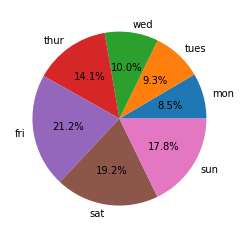

In [342]:
plt.pie(down_weekday,labels=list_weekday,autopct='%0.1f%%')

In [343]:
max(df_download[df_download['customer_id']=='C5001']['down_date'])-min(df_download[df_download['customer_id']=='C5001']['down_date'])

Timedelta('347 days 00:00:00')

In [344]:
from dateutil.relativedelta import relativedelta
str(max(df_download[df_download['customer_id']=='C5001']['down_date'])-min(df_download[df_download['customer_id']=='C5001']['down_date'])).replace(' days 00:00:00','')

'347'

In [345]:
df_download[df_download['customer_id']=='C5001']['down_date'][0]

Timestamp('2014-02-21 00:00:00')

In [346]:
from datetime import datetime
for i in range(len(merged_mv_cus)):
    if merged_mv_cus.last_down_date[i]!='.':
        merged_mv_cus.last_down_date[i]=datetime.strptime(merged_mv_cus.last_down_date[i], '%m-%d-%Y')
    else:
        pass
    print(i)

C:\Users\JinSoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062


In [347]:
after_1y = relativedelta(years=1)
for i in range(len(merged_mv_cus)):
    if merged_mv_cus.drop_year[i]!='.':
        if merged_mv_cus.last_down_date[i]!='.':
            merged_mv_cus.loc[i, 'expiration']=merged_mv_cus.last_down_date[i]+after_1y
        else:
            merged_mv_cus.loc[i, 'expiration']='.'
    else:
        if merged_mv_cus.last_down_date[i]+after_1y < datetime(2018,12,31,0,0):
            merged_mv_cus.loc[i, 'expiration']=merged_mv_cus.last_down_date[i]+after_1y
        else:
            merged_mv_cus.loc[i, 'expiration']=datetime(2018,12,31,0,0)

In [348]:
merged_mv_cus[40:50]

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration
40,C5041,F,GA,64,60s+,M,N,2014,N,.,2016-12-29 00:00:00,1,42.696823709359826,44.0,4.0,2017-12-29 00:00:00
41,C5042,F,IL,64,60s+,M,N,2014,N,.,2016-12-27 00:00:00,1,42.063598137932786,43.0,4.0,2017-12-27 00:00:00
42,C5043,M,DC,70,60s+,M,N,2014,N,.,2014-12-27 00:00:00,1,39.50621818361439,40.0,4.0,2015-12-27 00:00:00
43,C5044,F,SC,57,50s,M,N,2014,Y,2015,.,0,.,NaN,1.0,.
44,C5045,M,VA,31,30s,M,Y,2014,N,.,2017-11-25 00:00:00,1,46.845281301803965,48.0,4.0,2018-11-25 00:00:00
45,C5046,M,CA,74,60s+,S,N,2014,N,.,2014-12-31 00:00:00,1,36.571347118846,37.0,4.0,2015-12-31 00:00:00
46,C5047,M,MI,46,40s,M,N,2014,N,.,2014-12-21 00:00:00,1,36.01729918496839,37.0,4.0,2015-12-21 00:00:00
47,C5048,M,VA,68,60s+,M,N,2014,N,.,2016-12-30 00:00:00,1,35.82537712988199,36.0,4.0,2017-12-30 00:00:00
48,C5049,M,LA,18,10s,M,Y,2014,N,.,2014-12-16 00:00:00,1,33.89254977373463,35.0,4.0,2015-12-16 00:00:00
49,C5050,M,MA,56,50s,M,N,2014,N,.,2014-12-28 00:00:00,1,35.80871851559983,36.0,4.0,2015-12-28 00:00:00


In [350]:
for i in range(len(merged_mv_cus)):
    if merged_mv_cus.download_cnt.isnull()[i]==True:
        pass
    else:
        merged_mv_cus.loc[i,'first_down_date']=min(df_download[df_download['customer_id']==merged_mv_cus.customer_id[i]]['down_date'])

In [351]:
merged_mv_cus

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,2014-12-23 00:00:00,1,10.997323739842438,11.0,1.0,2015-12-23 00:00:00,2014-01-10
1,C5002,M,CA,23,20s,S,N,2014,N,.,2016-10-25 00:00:00,1,23.661645122771986,23.0,4.0,2017-10-25 00:00:00,2014-02-26
2,C5003,F,TX,39,30s,M,N,2014,N,.,2018-12-21 00:00:00,1,48.82168057044957,50.0,4.0,2018-12-31 00:00:00,2014-01-19
3,C5004,F,TX,69,60s+,M,N,2014,N,.,2014-12-30 00:00:00,1,38.82268563432438,40.0,4.0,2015-12-30 00:00:00,2014-02-28
4,C5005,F,SC,60,60s+,M,N,2014,N,.,2018-12-09 00:00:00,1,36.84197697319961,38.0,4.0,2018-12-31 00:00:00,2014-11-24
5,C5006,F,CA,76,60s+,S,N,2014,N,.,2015-12-12 00:00:00,1,48.837482299430775,50.0,4.0,2016-12-12 00:00:00,2014-04-01
6,C5007,F,FL,69,60s+,M,N,2014,N,.,2016-12-30 00:00:00,1,48.076937398386775,50.0,4.0,2017-12-30 00:00:00,2014-02-02
7,C5008,M,GA,39,30s,M,Y,2014,N,.,2015-12-26 00:00:00,1,40.74933685713398,42.0,4.0,2016-12-26 00:00:00,2014-01-15
8,C5009,M,VA,30,30s,M,Y,2014,Y,2015,2014-11-22 00:00:00,1,3.365991005977599,3.0,1.0,2015-11-22 00:00:00,2014-01-19
9,C5010,M,TN,32,30s,M,N,2014,N,.,2014-12-27 00:00:00,1,27.221373891803985,27.0,4.0,2015-12-27 00:00:00,2014-08-09


In [352]:
min(df_download[df_download['customer_id']=='C5018']['down_date'])

Timestamp('2014-04-05 00:00:00')

In [353]:
for i in range(len(merged_mv_cus)):
    if merged_mv_cus.download_cnt.isnull()[i]==True:
        merged_mv_cus.loc[i,'activation_day']=365
    else:
        merged_mv_cus.loc[i,'activation_day']=merged_mv_cus.expiration[i]-merged_mv_cus.first_down_date[i]

In [354]:
merged_mv_cus

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,2014-12-23 00:00:00,1,10.997323739842438,11.0,1.0,2015-12-23 00:00:00,2014-01-10,712 days 00:00:00
1,C5002,M,CA,23,20s,S,N,2014,N,.,2016-10-25 00:00:00,1,23.661645122771986,23.0,4.0,2017-10-25 00:00:00,2014-02-26,1337 days 00:00:00
2,C5003,F,TX,39,30s,M,N,2014,N,.,2018-12-21 00:00:00,1,48.82168057044957,50.0,4.0,2018-12-31 00:00:00,2014-01-19,1807 days 00:00:00
3,C5004,F,TX,69,60s+,M,N,2014,N,.,2014-12-30 00:00:00,1,38.82268563432438,40.0,4.0,2015-12-30 00:00:00,2014-02-28,670 days 00:00:00
4,C5005,F,SC,60,60s+,M,N,2014,N,.,2018-12-09 00:00:00,1,36.84197697319961,38.0,4.0,2018-12-31 00:00:00,2014-11-24,1498 days 00:00:00
5,C5006,F,CA,76,60s+,S,N,2014,N,.,2015-12-12 00:00:00,1,48.837482299430775,50.0,4.0,2016-12-12 00:00:00,2014-04-01,986 days 00:00:00
6,C5007,F,FL,69,60s+,M,N,2014,N,.,2016-12-30 00:00:00,1,48.076937398386775,50.0,4.0,2017-12-30 00:00:00,2014-02-02,1427 days 00:00:00
7,C5008,M,GA,39,30s,M,Y,2014,N,.,2015-12-26 00:00:00,1,40.74933685713398,42.0,4.0,2016-12-26 00:00:00,2014-01-15,1076 days 00:00:00
8,C5009,M,VA,30,30s,M,Y,2014,Y,2015,2014-11-22 00:00:00,1,3.365991005977599,3.0,1.0,2015-11-22 00:00:00,2014-01-19,672 days 00:00:00
9,C5010,M,TN,32,30s,M,N,2014,N,.,2014-12-27 00:00:00,1,27.221373891803985,27.0,4.0,2015-12-27 00:00:00,2014-08-09,505 days 00:00:00


In [357]:
str(merged_mv_cus.activation_day[0]).replace(' days 00:00:00','')

'712'

In [366]:
for i in range(len(merged_mv_cus)):
    if type(merged_mv_cus.activation_day[i]) is int:
        pass
    else:
        merged_mv_cus.activation_day[i]=str(merged_mv_cus.activation_day[i]).replace(' days 00:00:00','')
    print(i)

C:\Users\JinSoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062


In [365]:
type(merged_mv_cus.activation_day[2893]) is int

True

In [ ]:
#t0=datetime.datetime(2018,12,31,0,0)

#t0-after_1y==datetime.datetime(2017,12,31,0,0)
#t0-after_1y

In [367]:
merged_mv_cus

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,2014-12-23 00:00:00,1,10.997323739842438,11.0,1.0,2015-12-23 00:00:00,2014-01-10,712
1,C5002,M,CA,23,20s,S,N,2014,N,.,2016-10-25 00:00:00,1,23.661645122771986,23.0,4.0,2017-10-25 00:00:00,2014-02-26,1337
2,C5003,F,TX,39,30s,M,N,2014,N,.,2018-12-21 00:00:00,1,48.82168057044957,50.0,4.0,2018-12-31 00:00:00,2014-01-19,1807
3,C5004,F,TX,69,60s+,M,N,2014,N,.,2014-12-30 00:00:00,1,38.82268563432438,40.0,4.0,2015-12-30 00:00:00,2014-02-28,670
4,C5005,F,SC,60,60s+,M,N,2014,N,.,2018-12-09 00:00:00,1,36.84197697319961,38.0,4.0,2018-12-31 00:00:00,2014-11-24,1498
5,C5006,F,CA,76,60s+,S,N,2014,N,.,2015-12-12 00:00:00,1,48.837482299430775,50.0,4.0,2016-12-12 00:00:00,2014-04-01,986
6,C5007,F,FL,69,60s+,M,N,2014,N,.,2016-12-30 00:00:00,1,48.076937398386775,50.0,4.0,2017-12-30 00:00:00,2014-02-02,1427
7,C5008,M,GA,39,30s,M,Y,2014,N,.,2015-12-26 00:00:00,1,40.74933685713398,42.0,4.0,2016-12-26 00:00:00,2014-01-15,1076
8,C5009,M,VA,30,30s,M,Y,2014,Y,2015,2014-11-22 00:00:00,1,3.365991005977599,3.0,1.0,2015-11-22 00:00:00,2014-01-19,672
9,C5010,M,TN,32,30s,M,N,2014,N,.,2014-12-27 00:00:00,1,27.221373891803985,27.0,4.0,2015-12-27 00:00:00,2014-08-09,505


In [369]:
merged_mv_cus.to_csv('movie_customer_cleaned_ver4.csv',header=True, index=False)

# 여기부터 다시 시작!

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df_customer2=pd.read_csv('movie_customer_cleaned_ver4.csv',engine='python')
df_customer2.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,2014-12-23 00:00:00,1,10.997323739842438,11.0,1.0,2015-12-23 00:00:00,2014-01-10,712
1,C5002,M,CA,23,20s,S,N,2014,N,.,2016-10-25 00:00:00,1,23.661645122771986,23.0,4.0,2017-10-25 00:00:00,2014-02-26,1337
2,C5003,F,TX,39,30s,M,N,2014,N,.,2018-12-21 00:00:00,1,48.82168057044957,50.0,4.0,2018-12-31 00:00:00,2014-01-19,1807
3,C5004,F,TX,69,60s+,M,N,2014,N,.,2014-12-30 00:00:00,1,38.82268563432438,40.0,4.0,2015-12-30 00:00:00,2014-02-28,670
4,C5005,F,SC,60,60s+,M,N,2014,N,.,2018-12-09 00:00:00,1,36.84197697319961,38.0,4.0,2018-12-31 00:00:00,2014-11-24,1498


In [3]:
df_customer2['expiration'].value_counts()

2018-12-31 00:00:00    782
.                      539
2017-12-31 00:00:00     86
2017-12-30 00:00:00     79
2018-12-30 00:00:00     71
2018-12-29 00:00:00     63
2018-12-22 00:00:00     45
2018-12-28 00:00:00     40
2018-12-23 00:00:00     40
2016-12-31 00:00:00     37
2018-12-15 00:00:00     30
2017-12-23 00:00:00     28
2017-12-29 00:00:00     27
2018-12-24 00:00:00     27
2018-12-17 00:00:00     25
2017-12-25 00:00:00     24
2018-12-26 00:00:00     24
2018-12-25 00:00:00     23
2018-12-27 00:00:00     22
2018-12-14 00:00:00     21
2018-12-10 00:00:00     20
2018-12-19 00:00:00     20
2016-12-29 00:00:00     20
2016-12-30 00:00:00     20
2017-12-22 00:00:00     20
2018-12-16 00:00:00     19
2015-12-30 00:00:00     19
2015-12-31 00:00:00     19
2017-12-24 00:00:00     18
2016-12-26 00:00:00     17
                      ... 
2015-10-06 00:00:00      1
2015-08-01 00:00:00      1
2015-07-04 00:00:00      1
2015-05-16 00:00:00      1
2015-11-05 00:00:00      1
2016-09-25 00:00:00      1
2

In [4]:
pd.DataFrame(df_customer2['expiration'].value_counts(),index=df_customer2['expiration'].sort_values())

,expiration
expiration,
.,539
.,539
.,539
.,539
.,539
.,539
.,539
.,539
.,539


In [5]:
df_download=pd.read_csv('movie_download_cleaned.csv',engine='python')
df_download.head()

,customer_id,item_id,down_year,down_date,weekday,inf_year,down_price
0,C5001,I-1010,2014,02-21-2014,6,1.051872,0.946685
1,C5001,I-1014,2014,04-04-2014,6,1.051872,0.946685
2,C5001,I-1017,2014,01-19-2014,1,1.051872,0.946685
3,C5001,I-1028,2014,01-21-2014,3,1.051872,0.946685
4,C5001,I-1035,2014,03-11-2014,3,1.051872,0.899351


In [6]:
import datetime

df_download['down_date']=pd.to_datetime(df_download['down_date'])
down_counts=pd.DataFrame(df_download['down_date'].value_counts())
down_counts

,down_date
2017-02-03,117
2017-01-13,110
2017-06-09,108
2017-02-24,106
2018-03-23,106
2018-02-24,105
2018-02-09,105
2017-05-05,104
2017-02-17,103
2018-01-19,103


In [7]:
drop_villian=df_customer2[df_customer2['drop_flag']=='Y']
drop_villian=drop_villian.reset_index(drop=False,inplace=False)
drop_villian

,index,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
0,0,C5001,F,NC,51,50s,M,N,2014,Y,2015,2014-12-23 00:00:00,1,10.997323739842438,11.0,1.0,2015-12-23 00:00:00,2014-01-10,712
1,8,C5009,M,VA,30,30s,M,Y,2014,Y,2015,2014-11-22 00:00:00,1,3.365991005977599,3.0,1.0,2015-11-22 00:00:00,2014-01-19,672
2,17,C5018,F,TN,23,20s,S,N,2014,Y,2015,2014-04-05 00:00:00,1,0.9466849704311996,1.0,1.0,2015-04-05 00:00:00,2014-04-05,365
3,22,C5023,F,NV,19,10s,S,N,2014,Y,2015,2014-02-22 00:00:00,1,0.9466849704311996,1.0,1.0,2015-02-22 00:00:00,2014-02-22,365
4,29,C5030,F,LA,58,50s,M,N,2014,Y,2015,2014-10-12 00:00:00,1,6.206045917271197,6.0,1.0,2015-10-12 00:00:00,2014-03-21,570
5,38,C5039,M,NC,39,30s,M,Y,2014,Y,2015,2014-12-12 00:00:00,1,10.097973017932796,10.0,1.0,2015-12-12 00:00:00,2014-01-08,703
6,43,C5044,F,SC,57,50s,M,N,2014,Y,2015,.,0,.,NaN,1.0,.,NaN,365
7,50,C5051,F,NC,25,20s,S,N,2014,Y,2015,2014-08-29 00:00:00,1,3.134579124316639,3.0,1.0,2015-08-29 00:00:00,2014-01-07,599
8,62,C5063,M,TX,74,60s+,S,N,2014,Y,2015,2014-08-01 00:00:00,1,6.206045917271197,6.0,1.0,2015-08-01 00:00:00,2014-01-25,553
9,73,C5074,M,NV,33,30s,M,Y,2014,Y,2015,2014-05-21 00:00:00,1,0.9466849704311996,1.0,1.0,2015-05-21 00:00:00,2014-05-21,365


In [8]:
df_download=pd.read_csv('movie_download_cleaned.csv2.csv',engine='python')
df_download.head()

,customer_id,item_id,down_year,down_date,weekday,inf_year,down_price
0,C5001,I-1010,2014,2014-02-21 00:00:00,6,1.051872,0.946685
1,C5001,I-1014,2014,2014-04-04 00:00:00,6,1.051872,0.946685
2,C5001,I-1017,2014,2014-01-19 00:00:00,1,1.051872,0.946685
3,C5001,I-1028,2014,2014-01-21 00:00:00,3,1.051872,0.946685
4,C5001,I-1035,2014,2014-03-11 00:00:00,3,1.051872,0.899351


In [9]:
from datetime import datetime
df_download_ex=datetime.strptime(df_download['down_date'][0],'%Y-%m-%d %H:%M:%S')
print(str(df_download_ex))

2014-02-21 00:00:00


In [10]:
#for i in range(len(df_download)):
    #df_download['down_date'][i]=datetime.strptime(df_download['down_date'][i],'%m-%d-%Y')
    #df_download['down_date'][i]=str(df_download['down_date'][i])
    #print(i)

In [11]:
drop_down= drop_villian[['customer_id','last_down_date']]
drop_down

,customer_id,last_down_date
0,C5001,2014-12-23 00:00:00
1,C5009,2014-11-22 00:00:00
2,C5018,2014-04-05 00:00:00
3,C5023,2014-02-22 00:00:00
4,C5030,2014-10-12 00:00:00
5,C5039,2014-12-12 00:00:00
6,C5044,.
7,C5051,2014-08-29 00:00:00
8,C5063,2014-08-01 00:00:00
9,C5074,2014-05-21 00:00:00


In [12]:
df_download.to_csv('movie_download_cleaned.csv2.csv',header=True, index=False)

In [13]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [14]:
for i in range(len(drop_down)):
    if drop_down['last_down_date'][i]=='.':
        drop_down.loc[i,'last_item']='.'
    else:
        drop_down.loc[i,'last_item']=df_download[(df_download['customer_id']==drop_down['customer_id'][i]) & (df_download['down_date']==drop_down['last_down_date'][i])]['item_id'].values

C:\Users\JinSoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\JinSoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\JinSoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/i

In [15]:
df_download[(df_download['customer_id']==drop_down['customer_id'][0]) & (df_download['down_date']==drop_down['last_down_date'][0])]['item_id'].values

array(['I-1037'], dtype=object)

In [16]:
drop_down

,customer_id,last_down_date,last_item
0,C5001,2014-12-23 00:00:00,I-1037
1,C5009,2014-11-22 00:00:00,[I-1043]
2,C5018,2014-04-05 00:00:00,[I-1012]
3,C5023,2014-02-22 00:00:00,[I-1013]
4,C5030,2014-10-12 00:00:00,[I-1002]
5,C5039,2014-12-12 00:00:00,[I-1043]
6,C5044,.,.
7,C5051,2014-08-29 00:00:00,[I-1019]
8,C5063,2014-08-01 00:00:00,[I-1009]
9,C5074,2014-05-21 00:00:00,[I-1006]


In [17]:
type(drop_down.last_item[1])

numpy.ndarray

In [18]:
for i in range(len(drop_down)):
    #if type(drop_down.last_item[i]) is str:
       # pass
    #else:
    drop_down.last_item[i]=str(drop_down.last_item[i])
    drop_down.last_item[i]=drop_down.last_item[i].replace("['","")
    drop_down.last_item[i]=drop_down.last_item[i].replace("']","")

C:\Users\JinSoo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
drop_down

,customer_id,last_down_date,last_item
0,C5001,2014-12-23 00:00:00,I-1037
1,C5009,2014-11-22 00:00:00,I-1043
2,C5018,2014-04-05 00:00:00,I-1012
3,C5023,2014-02-22 00:00:00,I-1013
4,C5030,2014-10-12 00:00:00,I-1002
5,C5039,2014-12-12 00:00:00,I-1043
6,C5044,.,.
7,C5051,2014-08-29 00:00:00,I-1019
8,C5063,2014-08-01 00:00:00,I-1009
9,C5074,2014-05-21 00:00:00,I-1006


In [20]:
drop_down.last_item.value_counts()[1:]

I-1044    10
I-1045     9
I-1043     8
I-1041     8
I-1013     7
I-1042     6
I-1012     5
I-1010     5
I-1008     5
I-1039     5
I-1022     4
I-1015     4
I-1033     3
I-1037     3
I-1009     3
I-1032     2
I-1006     2
I-1007     2
I-1035     2
I-1024     2
I-1031     2
I-1030     2
I-1021     2
I-1020     2
I-1036     2
I-1038     2
I-1016     2
I-1019     2
I-1005     1
I-1040     1
I-1025     1
I-1023     1
I-1002     1
I-1003     1
I-1011     1
I-1014     1
I-1017     1
Name: last_item, dtype: int64

In [21]:
last_item2=pd.DataFrame(drop_down.last_item.value_counts()[1:])
last_item2.index

Index(['I-1044', 'I-1045', 'I-1043', 'I-1041', 'I-1013', 'I-1042', 'I-1012',
       'I-1010', 'I-1008', 'I-1039', 'I-1022', 'I-1015', 'I-1033', 'I-1037',
       'I-1009', 'I-1032', 'I-1006', 'I-1007', 'I-1035', 'I-1024', 'I-1031',
       'I-1030', 'I-1021', 'I-1020', 'I-1036', 'I-1038', 'I-1016', 'I-1019',
       'I-1005', 'I-1040', 'I-1025', 'I-1023', 'I-1002', 'I-1003', 'I-1011',
       'I-1014', 'I-1017'],
      dtype='object')

In [22]:
df_meta=pd.read_csv('movie_meta_cleaned_final3.csv',engine='python')
df_meta

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,TV-MA,TV-PG,TV-Y7,inf_income_int,inf_income_ww,inf_budget,inf_income_opening,studio_score,price_class,contract_price
0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,40683,136,PG-13,6.6,35478573.0,58936309.0,94414882.0,...,0,0,0,9.243261e+08,1.201261e+09,4.353960e+08,1.035667e+08,6,1,650
1,tt2395427,Avengers: Age of Ultron,2015,42125,141,PG-13,7.3,33569045.0,55802159.0,89371204.0,...,0,0,0,1.020156e+09,1.516187e+09,3.944425e+08,2.066999e+08,6,1,650
2,tt4154756,Avengers: Infinity War,2018,43217,156,PG-13,8.5,23700665.0,77736363.0,101437028.0,...,0,0,0,1.369544e+09,2.048360e+09,3.000000e+08,2.576982e+08,6,10,920
3,tt0449088,Pirates of the Caribbean: At World's End,2007,39227,167,PG-13,7.1,314040375.0,7640482.0,321680857.0,...,0,0,0,8.659796e+08,1.275692e+09,3.972384e+08,1.519209e+08,6,1,650
4,tt0974015,Justice League,2017,43056,121,PG-13,6.4,19449630.0,40475432.0,59925062.0,...,0,0,0,4.334829e+08,6.660274e+08,3.046112e+08,9.528464e+07,6,1,650
5,tt2379713,Spectre,2015,42314,148,PG-13,6.8,12917812.0,24092452.0,37010264.0,...,0,0,0,7.340845e+08,9.502158e+08,3.240768e+08,7.605343e+07,6,1,650
6,tt3778644,Solo: A Star Wars Story,2018,43245,135,PG-13,6.9,16048812.0,39496763.0,55545575.0,...,0,0,0,1.793838e+08,3.931513e+08,2.750000e+08,8.442049e+07,6,1,650
7,tt0401729,John Carter,2012,40977,132,PG-13,6.6,24755272.0,16426306.0,41181578.0,...,0,0,0,2.400181e+08,3.236317e+08,3.017974e+08,3.454039e+07,6,1,650
8,tt2975590,Batman v Superman: Dawn of Justice,2016,42454,151,PG-13,6.5,22477700.0,57744481.0,80222181.0,...,0,0,0,5.721656e+08,9.200941e+08,2.769861e+08,1.748355e+08,6,1,650
9,tt0398286,Tangled,2010,40506,101,PG,7.7,179787688.0,65663692.0,245451380.0,...,0,0,0,4.449186e+08,6.766006e+08,2.999539e+08,5.626104e+07,6,10,920


In [23]:
df_meta[df_meta['item_id'] == 'I-1044']

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,TV-MA,TV-PG,TV-Y7,inf_income_int,inf_income_ww,inf_budget,inf_income_opening,studio_score,price_class,contract_price
14,tt2310332,The Hobbit: The Battle of the Five Armies,2014,41990,144,PG-13,7.4,29485612.0,48209740.0,77695352.0,...,0,0,0,7.666857e+08,1.049971e+09,2.776005e+08,6.076601e+07,4,1,610


In [24]:
df_meta[df_meta['item_id'] == 'I-1044']

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,TV-MA,TV-PG,TV-Y7,inf_income_int,inf_income_ww,inf_budget,inf_income_opening,studio_score,price_class,contract_price
14,tt2310332,The Hobbit: The Battle of the Five Armies,2014,41990,144,PG-13,7.4,29485612.0,48209740.0,77695352.0,...,0,0,0,7.666857e+08,1.049971e+09,2.776005e+08,6.076601e+07,4,1,610


In [25]:
df_meta2=pd.merge(df_meta[df_meta['item_id'] == 'I-1044'],df_meta[df_meta['item_id'] == 'I-1045'],how='outer')

In [26]:
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1041'],how='outer')

In [27]:
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1043'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1013'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1042'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1010'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1012'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1008'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1039'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1015'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1022'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1033'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1037'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1009'],how='outer')

In [28]:
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1036'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1038'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1035'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1031'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1032'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1021'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1030'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1007'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1020'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1006'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1019'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1016'],how='outer')

In [29]:
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1024'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1017'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1025'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1005'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1011'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1003'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1040'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1014'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1023'],how='outer')
df_meta2=pd.merge(df_meta2,df_meta[df_meta['item_id'] == 'I-1002'],how='outer')

In [30]:
drop_count=drop_down.last_item.value_counts()[1:]

In [31]:
for i in range(len(df_meta2)):
    df_meta2.loc[i,'drop_count']=drop_count[i]

In [32]:
## 드롭한 빌런들
drop_villian

,index,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
0,0,C5001,F,NC,51,50s,M,N,2014,Y,2015,2014-12-23 00:00:00,1,10.997323739842438,11.0,1.0,2015-12-23 00:00:00,2014-01-10,712
1,8,C5009,M,VA,30,30s,M,Y,2014,Y,2015,2014-11-22 00:00:00,1,3.365991005977599,3.0,1.0,2015-11-22 00:00:00,2014-01-19,672
2,17,C5018,F,TN,23,20s,S,N,2014,Y,2015,2014-04-05 00:00:00,1,0.9466849704311996,1.0,1.0,2015-04-05 00:00:00,2014-04-05,365
3,22,C5023,F,NV,19,10s,S,N,2014,Y,2015,2014-02-22 00:00:00,1,0.9466849704311996,1.0,1.0,2015-02-22 00:00:00,2014-02-22,365
4,29,C5030,F,LA,58,50s,M,N,2014,Y,2015,2014-10-12 00:00:00,1,6.206045917271197,6.0,1.0,2015-10-12 00:00:00,2014-03-21,570
5,38,C5039,M,NC,39,30s,M,Y,2014,Y,2015,2014-12-12 00:00:00,1,10.097973017932796,10.0,1.0,2015-12-12 00:00:00,2014-01-08,703
6,43,C5044,F,SC,57,50s,M,N,2014,Y,2015,.,0,.,NaN,1.0,.,NaN,365
7,50,C5051,F,NC,25,20s,S,N,2014,Y,2015,2014-08-29 00:00:00,1,3.134579124316639,3.0,1.0,2015-08-29 00:00:00,2014-01-07,599
8,62,C5063,M,TX,74,60s+,S,N,2014,Y,2015,2014-08-01 00:00:00,1,6.206045917271197,6.0,1.0,2015-08-01 00:00:00,2014-01-25,553
9,73,C5074,M,NV,33,30s,M,Y,2014,Y,2015,2014-05-21 00:00:00,1,0.9466849704311996,1.0,1.0,2015-05-21 00:00:00,2014-05-21,365


In [33]:
## 드롭 빌런들이 본 영화 데이터 + 마지막에 본 영화 횟수
df_meta2

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,TV-PG,TV-Y7,inf_income_int,inf_income_ww,inf_budget,inf_income_opening,studio_score,price_class,contract_price,drop_count
0,tt2310332,The Hobbit: The Battle of the Five Armies,2014,41990,144,PG-13,7.4,29485612.0,48209740.0,77695352.0,...,0,0,7.666857e+08,1.049971e+09,2.776005e+08,6.076601e+07,4,1,610,10.0
1,tt2179136,American Sniper,2014,42020,132,R,7.3,38426699.0,41648593.0,80075292.0,...,0,0,2.131502e+08,5.915959e+08,6.269123e+07,6.846920e+05,6,1,650,9.0
2,tt1843866,Captain America: The Winter Soldier,2014,41733,135,PG-13,7.7,33116035.0,43038361.0,76154396.0,...,0,0,5.069653e+08,7.965974e+08,1.895594e+08,1.059567e+08,6,10,920,8.0
3,tt1951265,The Hunger Games: Mockingjay - Part 1,2014,41964,123,PG-13,6.6,33903092.0,45646120.0,79549212.0,...,0,0,4.782613e+08,8.537255e+08,1.392110e+08,1.357559e+08,4,1,610,8.0
4,tt0468569,The Dark Knight,2008,39647,152,PG-13,9.0,282771602.0,34481069.0,317252671.0,...,0,0,5.919411e+08,1.268524e+09,2.338563e+08,2.002460e+08,6,10,920,7.0
5,tt2015381,Guardians of the Galaxy,2014,41852,121,PG-13,8.0,61647909.0,86053679.0,147701588.0,...,0,0,4.901729e+08,8.616741e+08,1.895573e+08,1.051718e+08,6,10,920,6.0
6,tt0480249,I Am Legend,2007,39430,100,PG-13,7.2,141537587.0,4280058.0,145817645.0,...,0,0,4.322532e+08,7.689694e+08,1.969923e+08,1.014002e+08,6,1,650,5.0
7,tt0367882,Indiana Jones and the Kingdom of the Crystal S...,2008,39590,123,PG-13,6.1,117105049.0,.,117105049.0,...,0,0,5.957462e+08,9.980848e+08,2.347284e+08,1.270551e+08,6,1,650,5.0
8,tt0418279,Transformers,2007,39266,142,PG-13,7.0,295487660.0,8083309.0,303570969.0,...,0,0,5.151207e+08,9.378435e+08,1.999433e+08,9.335417e+07,6,1,650,5.0
9,tt2294629,Frozen,2013,41605,102,PG,7.5,246122258.0,162108802.0,408231060.0,...,0,0,9.736491e+08,1.422122e+09,1.678675e+08,2.723818e+05,6,10,920,5.0


In [34]:
df_meta2[df_meta.columns[37:58]].sum()

genre_action         20
genre_adventure      28
genre_drama           7
genre_sci-fi         15
genre_fantasy        16
genre_thriller        7
genre_animation       7
genre_family         11
genre_musical         1
genre_comedy          9
genre_romance         2
genre_mystery         3
genre_war             1
genre_western         0
genre_history         0
genre_sport           1
genre_horror          0
genre_crime           1
genre_music           0
genre_biography       2
genre_documentary     0
dtype: int64

Text(0.5, 1.0, 'drop age_group')

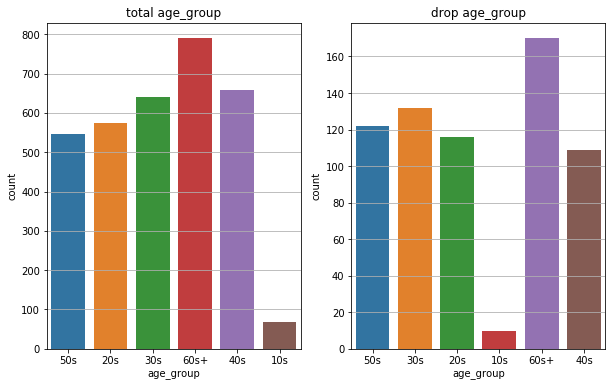

In [52]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

plt.subplot(1,2,1)
sns.countplot(df_customer2['age_group'])
plt.title('total age_group')
plt.subplot(1,2,2)
sns.countplot(drop_villian['age_group'])
plt.title('drop age_group')

In [65]:
df1=pd.DataFrame(df_customer2['state'].value_counts())
df1

,state
CA,461
NC,435
TX,273
NV,222
FL,217
SC,200
VA,152
TN,139
NY,135
MD,116


In [66]:
df2=pd.DataFrame(drop_villian['state'].value_counts())

In [70]:
df_state=pd.merge(df1, df2,left_index=True, right_index=True,how='right')
df_state.head()

,state_x,state_y
CA,461,93
NC,435,88
TX,273,53
NV,222,51
FL,217,48


In [71]:
for i in df_state.index:
    df_state.loc[i, 'total-drop']=df_state.state_x[i]-df_state.state_y[i]

In [77]:
for i in df_state.index:
    df_state.loc[i, 'total/drop']=df_state.state_x[i]/df_state.state_y[i]

In [99]:
for i in df_state.index:
    df_state.loc[i, '(total-drop)/drop']=(df_state.state_x[i]-df_state.state_y[i])/df_state.state_y[i]

In [103]:
np.mean(df_state['(total-drop)/drop'])

4.453175932733545

Text(0.5, 1.0, 'total/drop counts')

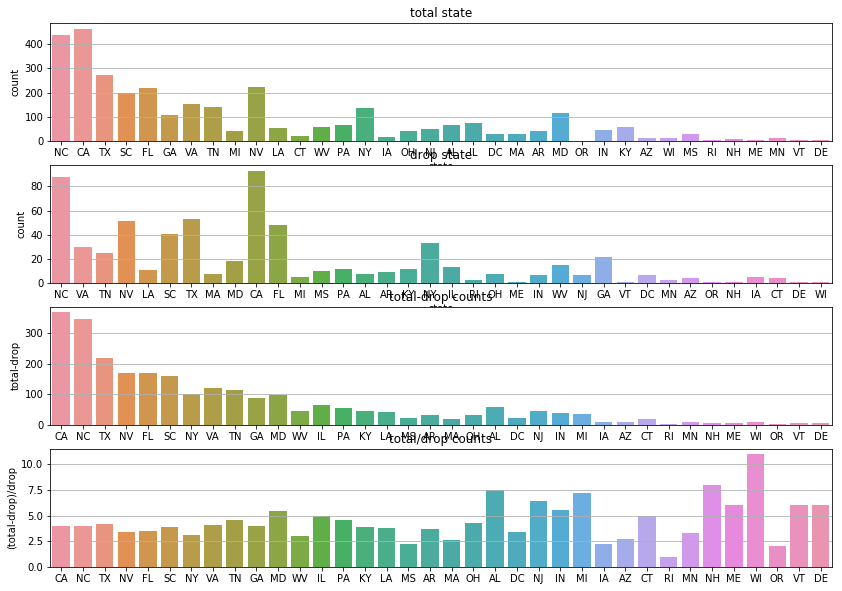

In [106]:
plt.rcParams["figure.figsize"] = (14,10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

plt.subplot(4,1,1)
sns.countplot(df_customer2['state'])
plt.title('total state')
plt.subplot(4,1,2)
sns.countplot(drop_villian['state'])
plt.title('drop state')
plt.subplot(4,1,3)
sns.barplot(x=df_state.index,y='total-drop',data=df_state)
plt.title('total-drop counts')
plt.subplot(4,1,4)
sns.barplot(x=df_state.index,y='(total-drop)/drop',data=df_state)
plt.title('total/drop counts')

Text(0.5, 1.0, 'drop gender')

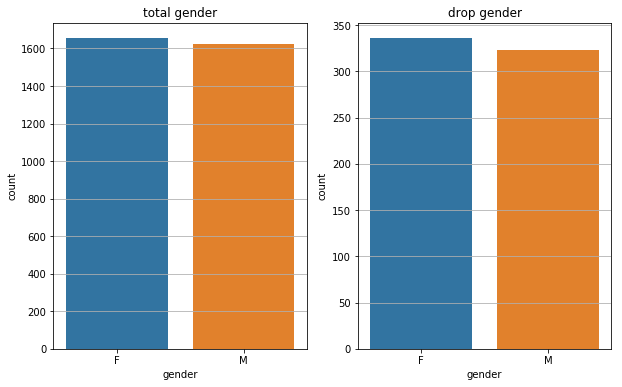

In [58]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

plt.subplot(1,2,1)
sns.countplot(df_customer2['gender'])
plt.title('total gender')
plt.subplot(1,2,2)
sns.countplot(drop_villian['gender'])
plt.title('drop gender')

Text(0.5, 1.0, 'drop married')

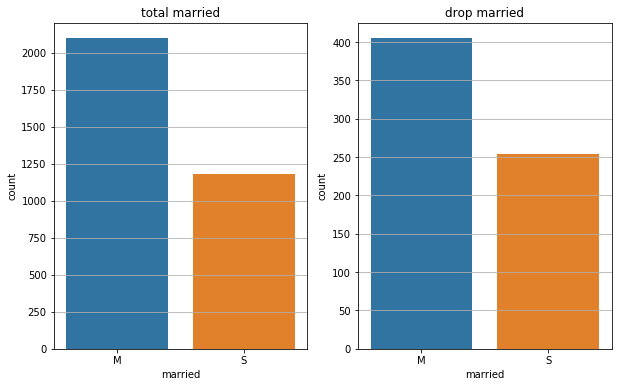

In [59]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

plt.subplot(1,2,1)
sns.countplot(df_customer2['married'])
plt.title('total married')
plt.subplot(1,2,2)
sns.countplot(drop_villian['married'])
plt.title('drop married')

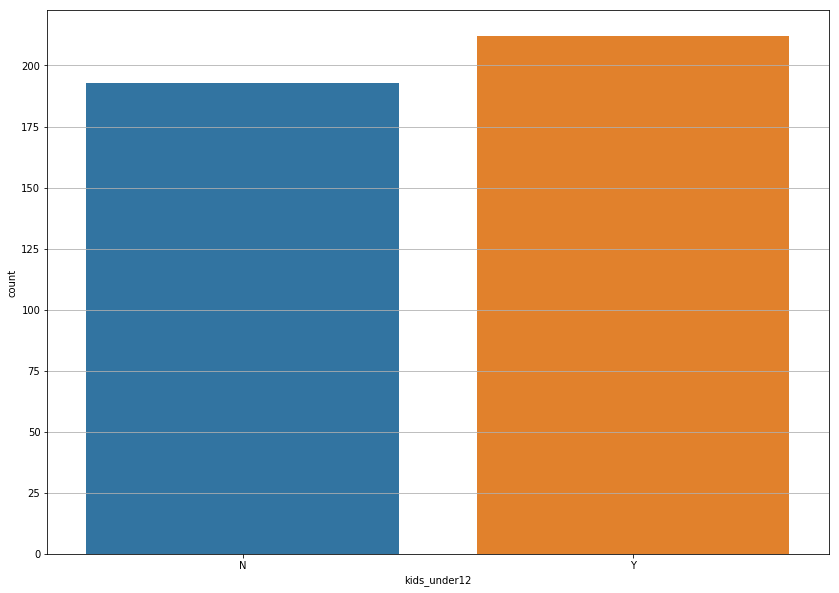

In [119]:
sns.countplot(drop_villian[drop_villian['married']=='M']['kids_under12'])

In [ ]:
## df_meta2

In [79]:
df_meta2.columns

Index(['movie_id', 'title', 'release_year', 'release_date', 'runtime',
       'mpa_rating', 'imdb_score', 'dvd_sales', 'blu_sales', 'total_sales',
       'legs', 'share', 'inf_income_usa', 'theater_opening', 'theater_total',
       'src', 'awards', 'poster', 'metascore', 'release_dvd', 'big_awards_num',
       'awards_win_num', 'awards_nomin_num', 'reviews_users',
       'reviews_critics', 'prd_mthd', 'budget', 'series_new', 'income_opening',
       'votes', 'income_usa', 'income_int', 'income_ww', 'item_id',
       'inv_exist', 'contract_year', 'inf', 'genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary',
       'dvd_over_income', 'movie_down_sales', 'contract

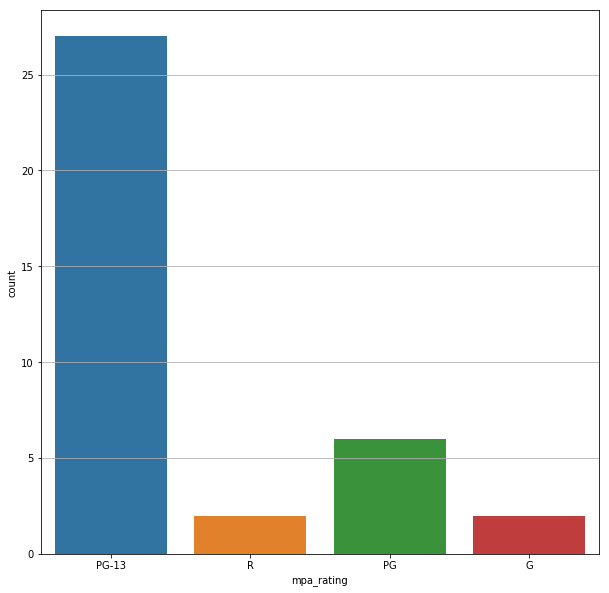

In [41]:
sns.countplot(df_meta2['mpa_rating'])

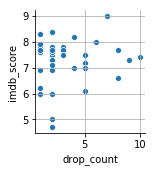

In [40]:
sns.pairplot(x_vars='drop_count',y_vars='imdb_score',data=df_meta2)

Text(0.5, 1.0, 'blu')

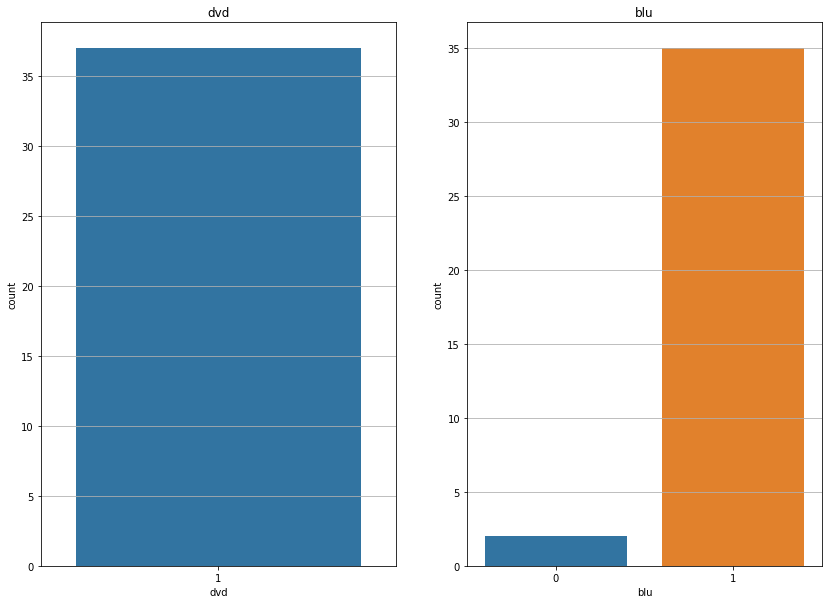

In [109]:
plt.subplot(1,2,1)
sns.countplot(df_meta2['dvd'])
plt.title('dvd')
plt.subplot(1,2,2)
sns.countplot(df_meta2['blu'])
plt.title('blu')

Text(0.5, 1.0, 'genre_sci-fi')

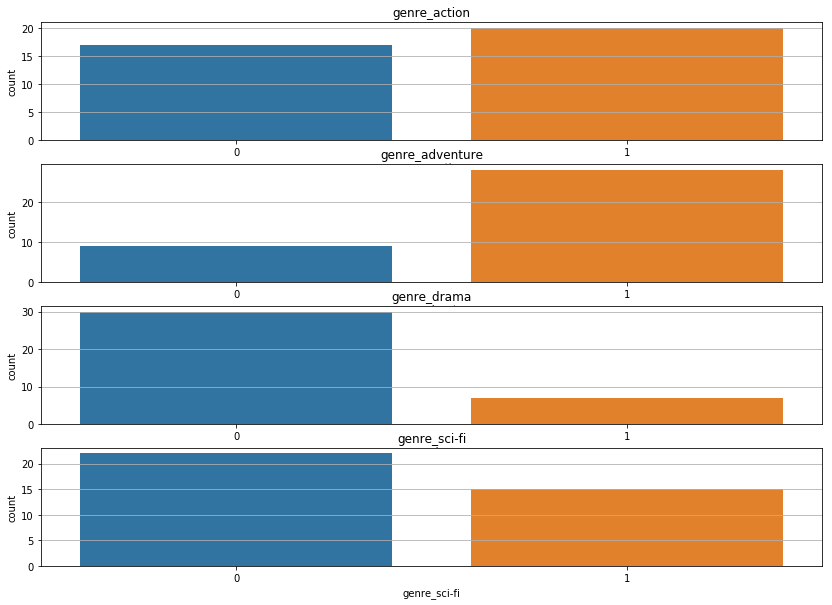

In [94]:
#'genre_action', 'genre_adventure','genre_drama', 'genre_sci-fi'

plt.subplot(4,1,1)
sns.countplot(df_meta2['genre_action'])
plt.title('genre_action')
plt.subplot(4,1,2)
sns.countplot(df_meta2['genre_adventure'])
plt.title('genre_adventure')
plt.subplot(4,1,3)
sns.countplot(df_meta2['genre_drama'])
plt.title('genre_drama')
plt.subplot(4,1,4)
sns.countplot(df_meta2['genre_sci-fi'])
plt.title('genre_sci-fi')

Text(0.5, 1.0, 'genre_family')

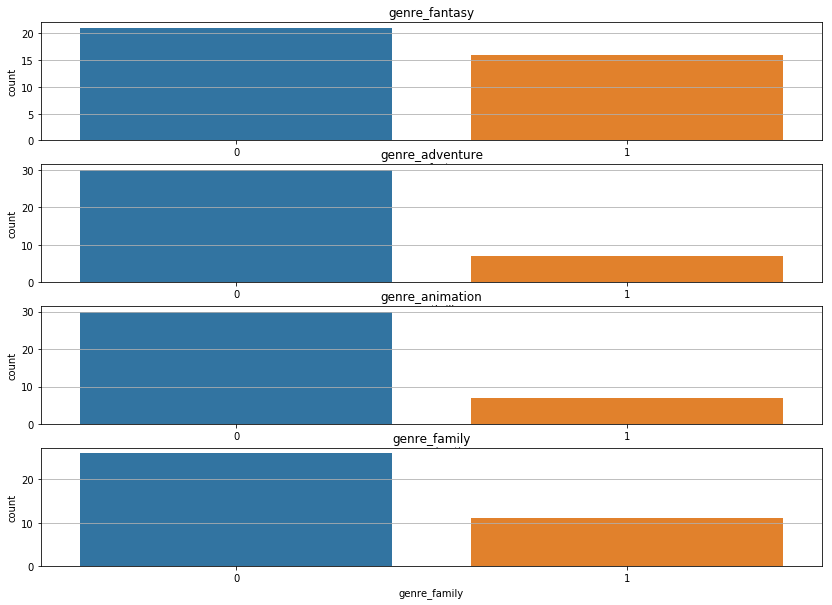

In [95]:
#'genre_fantasy', 'genre_thriller','genre_animation', 'genre_family'

plt.subplot(4,1,1)
sns.countplot(df_meta2['genre_fantasy'])
plt.title('genre_fantasy')
plt.subplot(4,1,2)
sns.countplot(df_meta2['genre_thriller'])
plt.title('genre_adventure')
plt.subplot(4,1,3)
sns.countplot(df_meta2['genre_animation'])
plt.title('genre_animation')
plt.subplot(4,1,4)
sns.countplot(df_meta2['genre_family'])
plt.title('genre_family')

Text(0.5, 1.0, 'genre_mystery')

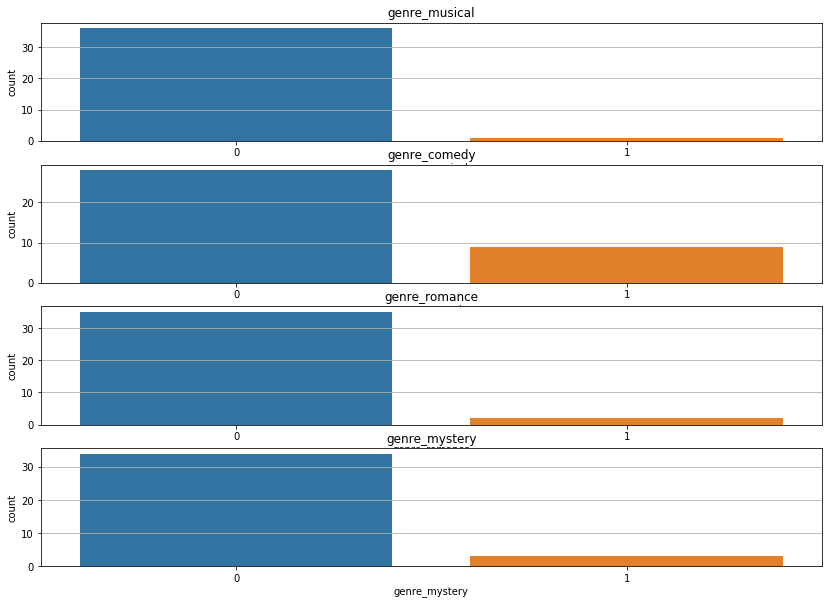

In [96]:
#'genre_musical', 'genre_comedy','genre_romance', 'genre_mystery'

plt.subplot(4,1,1)
sns.countplot(df_meta2['genre_musical'])
plt.title('genre_musical')
plt.subplot(4,1,2)
sns.countplot(df_meta2['genre_comedy'])
plt.title('genre_comedy')
plt.subplot(4,1,3)
sns.countplot(df_meta2['genre_romance'])
plt.title('genre_romance')
plt.subplot(4,1,4)
sns.countplot(df_meta2['genre_mystery'])
plt.title('genre_mystery')

Text(0.5, 1.0, 'genre_sport')

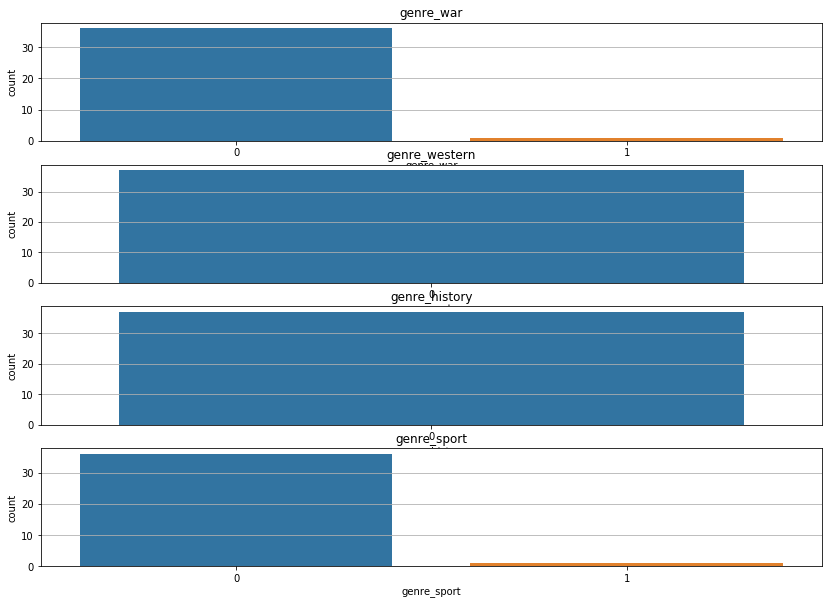

In [97]:
# 'genre_war', 'genre_western','genre_history', 'genre_sport'

plt.subplot(4,1,1)
sns.countplot(df_meta2['genre_war'])
plt.title('genre_war')
plt.subplot(4,1,2)
sns.countplot(df_meta2['genre_western'])
plt.title('genre_western')
plt.subplot(4,1,3)
sns.countplot(df_meta2['genre_history'])
plt.title('genre_history')
plt.subplot(4,1,4)
sns.countplot(df_meta2['genre_sport'])
plt.title('genre_sport')

Text(0.5, 1.0, 'genre_documentary')

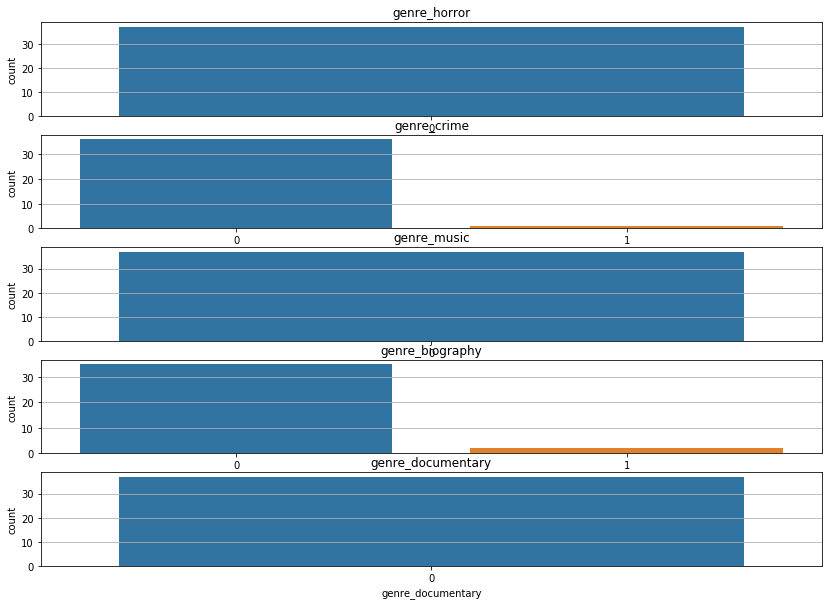

In [98]:
# 'genre_horror', 'genre_crime','genre_music', 'genre_biography', 'genre_documentary'

plt.subplot(5,1,1)
sns.countplot(df_meta2['genre_horror'])
plt.title('genre_horror')
plt.subplot(5,1,2)
sns.countplot(df_meta2['genre_crime'])
plt.title('genre_crime')
plt.subplot(5,1,3)
sns.countplot(df_meta2['genre_music'])
plt.title('genre_music')
plt.subplot(5,1,4)
sns.countplot(df_meta2['genre_biography'])
plt.title('genre_biography')
plt.subplot(5,1,5)
sns.countplot(df_meta2['genre_documentary'])
plt.title('genre_documentary')

In [170]:
df_customer2[40:50]

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
40,C5041,F,GA,64,60s+,M,N,2014,N,.,2016-12-29 00:00:00,1,42.696823709359826,44.0,4.0,2017-12-29 00:00:00,2014-01-25 00:00:00,1434
41,C5042,F,IL,64,60s+,M,N,2014,N,.,2016-12-27 00:00:00,1,42.063598137932786,43.0,4.0,2017-12-27 00:00:00,2014-01-11 00:00:00,1446
42,C5043,M,DC,70,60s+,M,N,2014,N,.,2014-12-27 00:00:00,1,39.50621818361439,40.0,4.0,2015-12-27 00:00:00,2014-03-20 00:00:00,647
43,C5044,F,SC,57,50s,M,N,2014,Y,2015,.,0,.,NaN,1.0,.,NaN,365
44,C5045,M,VA,31,30s,M,Y,2014,N,.,2017-11-25 00:00:00,1,46.845281301803965,48.0,4.0,2018-11-25 00:00:00,2014-05-16,1654
45,C5046,M,CA,74,60s+,S,N,2014,N,.,2014-12-31 00:00:00,1,36.571347118846,37.0,4.0,2015-12-31 00:00:00,2014-01-15,715
46,C5047,M,MI,46,40s,M,N,2014,N,.,2014-12-21 00:00:00,1,36.01729918496839,37.0,4.0,2015-12-21 00:00:00,2014-01-05,715
47,C5048,M,VA,68,60s+,M,N,2014,N,.,2016-12-30 00:00:00,1,35.82537712988199,36.0,4.0,2017-12-30 00:00:00,2014-01-05,1455
48,C5049,M,LA,18,10s,M,Y,2014,N,.,2014-12-16 00:00:00,1,33.89254977373463,35.0,4.0,2015-12-16 00:00:00,2014-01-17,698
49,C5050,M,MA,56,50s,M,N,2014,N,.,2014-12-28 00:00:00,1,35.80871851559983,36.0,4.0,2015-12-28 00:00:00,2014-01-10,717


In [112]:
df_customer2.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,2014-12-23 00:00:00,1,10.997323739842438,11.0,1.0,2015-12-23 00:00:00,2014-01-10,712
1,C5002,M,CA,23,20s,S,N,2014,N,.,2016-10-25 00:00:00,1,23.661645122771986,23.0,4.0,2017-10-25 00:00:00,2014-02-26,1337
2,C5003,F,TX,39,30s,M,N,2014,N,.,2018-12-21 00:00:00,1,48.82168057044957,50.0,4.0,2018-12-31 00:00:00,2014-01-19,1807
3,C5004,F,TX,69,60s+,M,N,2014,N,.,2014-12-30 00:00:00,1,38.82268563432438,40.0,4.0,2015-12-30 00:00:00,2014-02-28,670
4,C5005,F,SC,60,60s+,M,N,2014,N,.,2018-12-09 00:00:00,1,36.84197697319961,38.0,4.0,2018-12-31 00:00:00,2014-11-24,1498


In [174]:
df_customer2.tail()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag,customer_sales,download_cnt,duration,expiration,first_down_date,activation_day
3272,C8273,F,SC,49,40s,M,N,2018,N,.,2018-12-18 00:00:00,1,9.990000000000002,11.0,0.0,2018-12-31 00:00:00,2018-02-24 00:00:00,310
3273,C8274,F,NV,61,60s+,M,N,2018,N,.,2018-12-29 00:00:00,1,21.770000000000003,23.0,0.0,2018-12-31 00:00:00,2018-01-31 00:00:00,334
3274,C8275,F,CA,59,50s,S,N,2018,N,.,2018-11-23 00:00:00,1,4.41,5.0,0.0,2018-12-31 00:00:00,2018-05-15 00:00:00,230
3275,C8276,F,TX,36,30s,S,Y,2018,N,.,2018-12-05 00:00:00,1,13.480000000000002,14.0,0.0,2018-12-31 00:00:00,2018-01-07 00:00:00,358
3276,C8277,M,CA,64,60s+,S,N,2018,N,.,2018-07-07 00:00:00,1,3.8,4.0,0.0,2018-12-31 00:00:00,2018-04-19 00:00:00,256


In [172]:
for i in range(43,len(df_customer2)):
    if df_customer2.first_down_date.isnull()[i]==True:
        pass
    else:
        df_customer2.first_down_date[i]=datetime.strptime(df_customer2.first_down_date[i], '%Y-%m-%d')

C:\Users\JinSoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [129]:
df_customer2[df_customer2['expiration']!='.']['expiration']

0       2015-12-23 00:00:00
1       2017-10-25 00:00:00
2       2018-12-31 00:00:00
3       2015-12-30 00:00:00
4       2018-12-31 00:00:00
5       2016-12-12 00:00:00
6       2017-12-30 00:00:00
7       2016-12-26 00:00:00
8       2015-11-22 00:00:00
9       2015-12-27 00:00:00
10      2017-12-28 00:00:00
11      2018-12-22 00:00:00
12      2015-12-22 00:00:00
13      2017-12-23 00:00:00
14      2016-12-29 00:00:00
15      2016-12-28 00:00:00
16      2018-12-31 00:00:00
17      2015-04-05 00:00:00
18      2018-12-31 00:00:00
19      2017-12-31 00:00:00
20      2017-12-09 00:00:00
21      2018-12-08 00:00:00
22      2015-02-22 00:00:00
23      2018-12-31 00:00:00
24      2018-12-31 00:00:00
25      2018-11-15 00:00:00
26      2017-12-09 00:00:00
27      2017-12-21 00:00:00
28      2015-12-28 00:00:00
29      2015-10-12 00:00:00
               ...         
3247    2017-12-30 00:00:00
3248    2018-11-30 00:00:00
3249    2018-12-31 00:00:00
3250    2018-12-31 00:00:00
3251    2018-12-18 0

In [128]:
df_expiration=pd.DataFrame(df_customer2[df_customer2['expiration']!='.']['expiration'].value_counts(),index=df_customer2[df_customer2['expiration']!='.']['expiration'].value_counts().index.sort_values())
df_expiration

,expiration
2015-01-10 00:00:00,1
2015-01-11 00:00:00,1
2015-02-22 00:00:00,1
2015-02-26 00:00:00,1
2015-03-13 00:00:00,1
2015-04-05 00:00:00,1
2015-05-16 00:00:00,1
2015-05-21 00:00:00,1
2015-05-26 00:00:00,1
2015-06-25 00:00:00,1


In [177]:
df_customer2[df_customer2['first_down_date'].notnull()]['first_down_date']

0       2014-01-10 00:00:00
1       2014-02-26 00:00:00
2       2014-01-19 00:00:00
3       2014-02-28 00:00:00
4       2014-11-24 00:00:00
5       2014-04-01 00:00:00
6       2014-02-02 00:00:00
7       2014-01-15 00:00:00
8       2014-01-19 00:00:00
9       2014-08-09 00:00:00
10      2014-02-03 00:00:00
11      2015-02-13 00:00:00
12      2014-01-12 00:00:00
13      2014-01-24 00:00:00
14      2014-05-17 00:00:00
15      2014-01-30 00:00:00
16      2014-03-31 00:00:00
17      2014-04-05 00:00:00
18      2014-02-08 00:00:00
19      2014-02-14 00:00:00
20      2014-06-12 00:00:00
21      2014-01-03 00:00:00
22      2014-02-22 00:00:00
23      2014-04-03 00:00:00
24      2014-03-28 00:00:00
25      2014-01-31 00:00:00
26      2014-01-28 00:00:00
27      2014-01-01 00:00:00
28      2014-01-21 00:00:00
29      2014-03-21 00:00:00
               ...         
3247    2016-12-30 00:00:00
3248    2017-06-01 00:00:00
3249    2017-01-01 00:00:00
3250    2017-04-14 00:00:00
3251    2017-03-22 0

In [181]:
df_first=df_customer2[df_customer2['first_down_date'].notnull()]['first_down_date'].value_counts()
df_first=pd.DataFrame(df_first,index=df_customer2[df_customer2['first_down_date'].notnull()]['first_down_date'].value_counts().index.sort_values())
df_first

,first_down_date
2014-01-01,10
2014-01-02,13
2014-01-03,12
2014-01-04,19
2014-01-05,16
2014-01-06,11
2014-01-07,14
2014-01-08,10
2014-01-09,10
2014-01-10,25


In [188]:
df_first_ex= pd.merge(df_first, df_expiration,left_index=True, right_index=True,how='outer')
df_first_ex= df_first_ex.fillna(0)
df_first_ex

,first_down_date,expiration
2014-01-01,10.0,0.0
2014-01-02,13.0,0.0
2014-01-03,12.0,0.0
2014-01-04,19.0,0.0
2014-01-05,16.0,0.0
2014-01-06,11.0,0.0
2014-01-07,14.0,0.0
2014-01-08,10.0,0.0
2014-01-09,10.0,0.0
2014-01-10,25.0,0.0


In [191]:
for i in range(len(df_first_ex)):
    df_first_ex.loc[df_first_ex.index[i],'present_customer']=df_first_ex['first_down_date'][df_first_ex.index[i]]-df_first_ex['expiration'][df_first_ex.index[i]]

In [199]:
df_first_ex

,first_down_date,expiration,present_customer
2014-01-01,10.0,0.0,10.0
2014-01-02,13.0,0.0,13.0
2014-01-03,12.0,0.0,12.0
2014-01-04,19.0,0.0,19.0
2014-01-05,16.0,0.0,16.0
2014-01-06,11.0,0.0,11.0
2014-01-07,14.0,0.0,14.0
2014-01-08,10.0,0.0,10.0
2014-01-09,10.0,0.0,10.0
2014-01-10,25.0,0.0,25.0


In [200]:
df_first_ex.expiration['2018-12-31']=0;df_first_ex.present_customer['2018-12-31']=0

In [205]:
df_cus_cumsum=df_first_ex[['present_customer']].cumsum(axis=0)

In [212]:
df_cus_cumsum

,present_customer
2014-01-01,10.0
2014-01-02,23.0
2014-01-03,35.0
2014-01-04,54.0
2014-01-05,70.0
2014-01-06,81.0
2014-01-07,95.0
2014-01-08,105.0
2014-01-09,115.0
2014-01-10,140.0


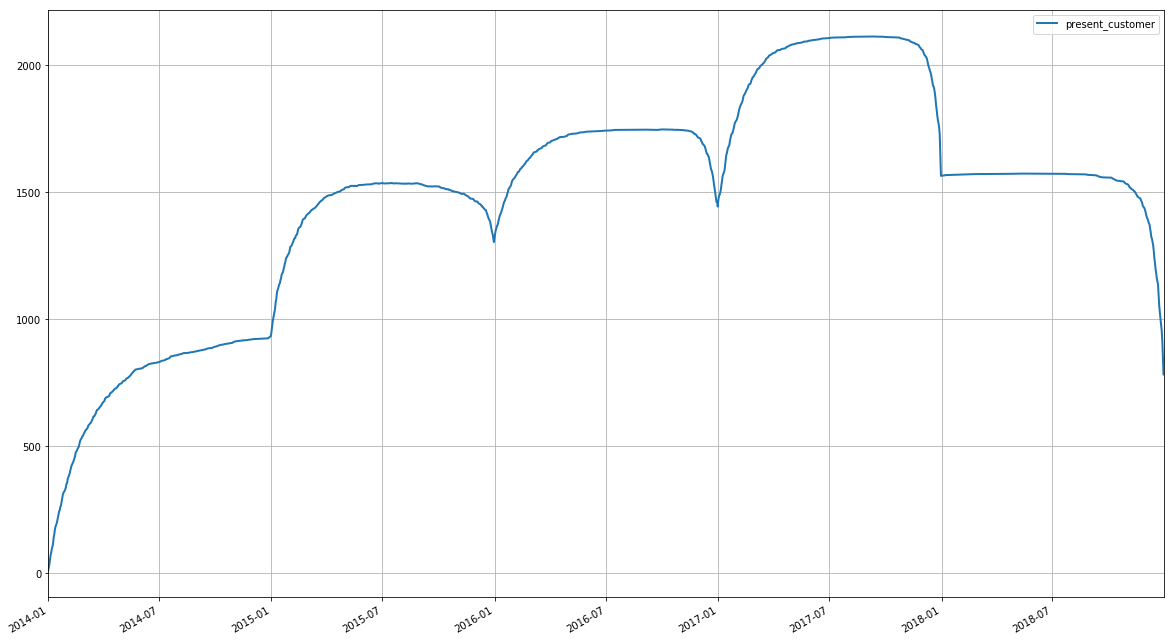

In [206]:
df_cus_cumsum.plot(figsize=(20,12))

In [208]:
df_first_ex

,first_down_date,expiration,present_customer
2014-01-01,10.0,0.0,10.0
2014-01-02,13.0,0.0,13.0
2014-01-03,12.0,0.0,12.0
2014-01-04,19.0,0.0,19.0
2014-01-05,16.0,0.0,16.0
2014-01-06,11.0,0.0,11.0
2014-01-07,14.0,0.0,14.0
2014-01-08,10.0,0.0,10.0
2014-01-09,10.0,0.0,10.0
2014-01-10,25.0,0.0,25.0
